In [2]:
import csv
f = open('./Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

#도미
bream_weight = []
bream_length = []
#빙어
smelt_weight = []
smelt_length = []

for row in data:
    if row[0] == "Bream":
        bream_weight.append(float(row[1]))
        bream_length.append(float(row[3]))
        
    if row[0] == "Smelt":
        smelt_weight.append(float(row[1]))
        smelt_length.append(float(row[3]))
        
f.close()

fish_weight =  bream_weight + smelt_weight
fish_length =  bream_length + smelt_length

print('fish_weight = ', fish_weight)
print('fish_length = ', fish_length)


fish_weight =  [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_length =  [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [3]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight)) #튜플 형태로 값을 넘겨주고 있습니다.

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
#fish_target = [1] * 35 + [0] * 14

np.ones(35) # one = 1,1,1,1,1,1
np.zeros(14) #zero = 0, zeros = 0,0,0,0,0,0,0

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [5]:
# 이 함수로 전달되는 리스트나 배열을 비율에 맞게 학습 데이터셋과 시험 데이터셋으로 나누어주는 함수
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) 

In [6]:
print(train_input.shape, test_input.shape) # shape, 모양, 형태

(36, 2) (13, 2)


In [7]:
print(train_target.shape, test_target.shape) # shape, 모양, 형태

(36,) (13,)


In [8]:
print(train_target) # shape, 모양, 형태

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [9]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify = fish_target) 

In [11]:
print(test_target) # 9:4 --> 2.25:1 

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

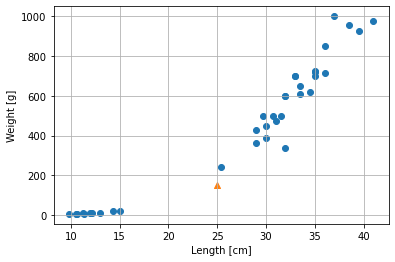

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.show()

In [14]:
kn.predict([[25,150]])

# 1: 도미, 0: 빙어

array([0.])

In [24]:
#가까운 K개의 거리와 해당 좌표 반환 kneighbors([[25,150]]) 튜플
distances, indexes = kn.kneighbors([[25,150]])

print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


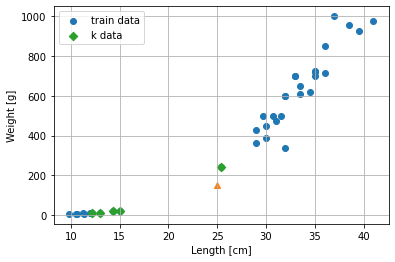

In [22]:
plt.scatter(train_input[:,0], train_input[:,1], label='train data')
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D', label='k data')
plt.xlabel('Length [cm]')
plt.ylabel('Weight [g]')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
print(train_input[indexes, :])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [18]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [19]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
